In [41]:
%run paramtools.ipynb

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


 393 :
volume (w/s): 
WilcoxonResult(statistic=8929.0, pvalue=6.9812943380088711e-40) 
SpearmanrResult(correlation=0.98772908876051491, pvalue=2.0661271955557588e-317) 
surface (w/s): 
WilcoxonResult(statistic=16092.0, pvalue=1.0352416112895086e-23) 
SpearmanrResult(correlation=0.9883181395905386, pvalue=1.4525529987732648e-321) 



,surface error [%],volume error [%],measurement_resolution
0,-1.781025,-3.824529,15
220,-4.018624,-1.097203,15
221,0.522287,0.006553,15
223,-4.018624,-1.097203,15
227,-4.795423,-1.255504,15
237,-4.795423,-1.255504,15
241,-4.795423,-1.255504,15
379,0.769963,0.003043,15
245,-4.795423,-1.255504,15
247,-4.795423,-1.255504,15


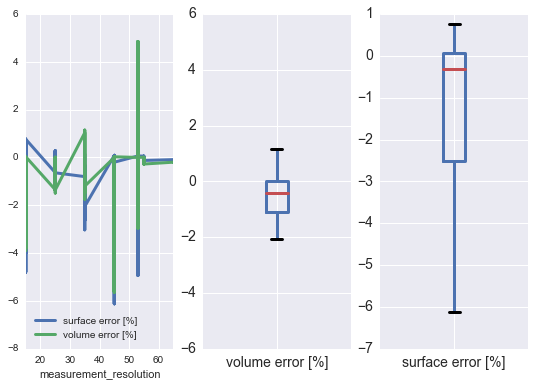

In [42]:
show_error(df)

In [43]:
df["output note"]

0                           element number inscribed
1      element number cylinder volume + sphere error
2                           element number inscribed
3                           element number inscribed
4                           element number inscribed
5                           element number inscribed
6                           element number inscribed
7                           element number inscribed
8                           element number inscribed
9                           element number inscribed
10                          element number inscribed
11                          element number inscribed
12                          element number inscribed
13                          element number inscribed
14                          element number inscribed
15                          element number inscribed
16                          element number inscribed
17                          element number inscribed
18                          element number ins

# Object number

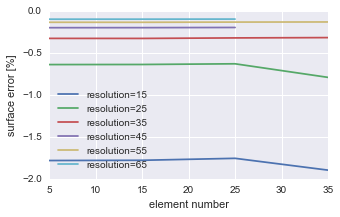

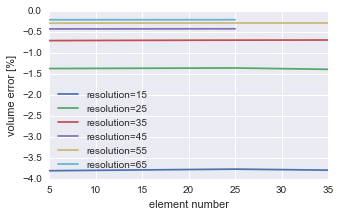

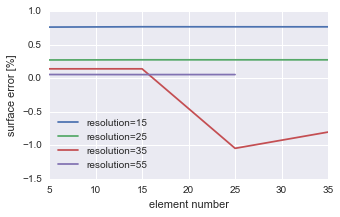

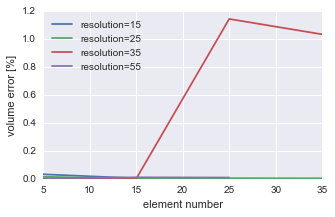

In [44]:

for radius_method in available_radius_methods:
    dfs = df[
        df["output note"] == "element number " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    if len(dfs) < 1:
        continue

    # surface
    ykey="surface error [mm^2]"
    ykey="surface error [%]"
    dfs_group = dfs[["element number", "measurement_resolution", ykey]].sort_values(by="element number").groupby(by="measurement_resolution")
    # .plot(x="element_number")

    fig, ax = plt.subplots(figsize=(5,3))
    # dfs_group.plot(x="element_number", y="surface error [%]", ax=ax)
    for label, dfi in dfs_group:
        #dfi.plot(x="element number", y=ykey, ax=ax, label="resolution={}".format(label))
        dfi.groupby(by="element number").mean().reset_index().plot(x="element number", y=ykey, ax=ax, label="resolution={}".format(label))
    #    df.vals.plot(x="element_number", ax=ax, label=label)
    #plt.legend()
    plt.ylabel(ykey)
    fn = "element_number_surface_" + radius_method 
    plt.savefig(fn + ".pdf", bbox_inches='tight')
    plt.savefig(fn + ".png", bbox_inches='tight', dpi=600)
    
    # volume
    ykey="volume error [mm^3]"
    ykey="volume error [%]"
    dfs_group = dfs[["element number", "measurement_resolution", ykey]].sort_values(by="element number").groupby(by="measurement_resolution")
    # .plot(x="element_number")

    fig, ax = plt.subplots(figsize=(5,3))
    # dfs_group.plot(x="element_number", y="surface error [%]", ax=ax)
    for label, dfi in dfs_group:
        dfi.groupby(by="element number").mean().reset_index().plot(x="element number", y=ykey, ax=ax, label="resolution={}".format(label))
    #    df.vals.plot(x="element_number", ax=ax, label=label)
    #plt.legend()
    plt.ylabel(ykey)
    fn = "element_number_volume_" + radius_method 
    plt.savefig(fn + ".pdf", bbox_inches='tight')
    plt.savefig(fn + ".png", bbox_inches='tight', dpi=600)

In [45]:
zip(list(dfs_group))

[((15,      element number  measurement_resolution  volume error [%]
   1                 5                      15          0.032403
   363               5                      15          0.032403
   371              15                      15          0.003795
   379              25                      15          0.003043
   387              35                      15          0.002597),),
 ((25,      element number  measurement_resolution  volume error [%]
   365               5                      25          0.014962
   373              15                      25          0.001394
   381              25                      25          0.000864
   389              35                      25          0.000491),),
 ((35,      element number  measurement_resolution  volume error [%]
   367               5                      35          0.000747
   375              15                      35          0.000366
   383              25                      35          1.145816
   39